# Seminar 12 - Experiment Designs

## 1. Tooth growth in guinea pigs
Download the ToothGrowth data set from R and read its description.
1. Create some plots which would help you to explore the effects of vitamin C dose and its delivery
method on the tooth growth and state an appropriate research hypothesis.
2. Consider dose as a factor variable and use the analysis of variance to test your hypothesis. Are the dose effect and delivery effect significant?
3. Which statistical test can we use to check whether the dose effect varies depending on the delivery method?

In [2]:
library("ggplot2")
data("ToothGrowth")

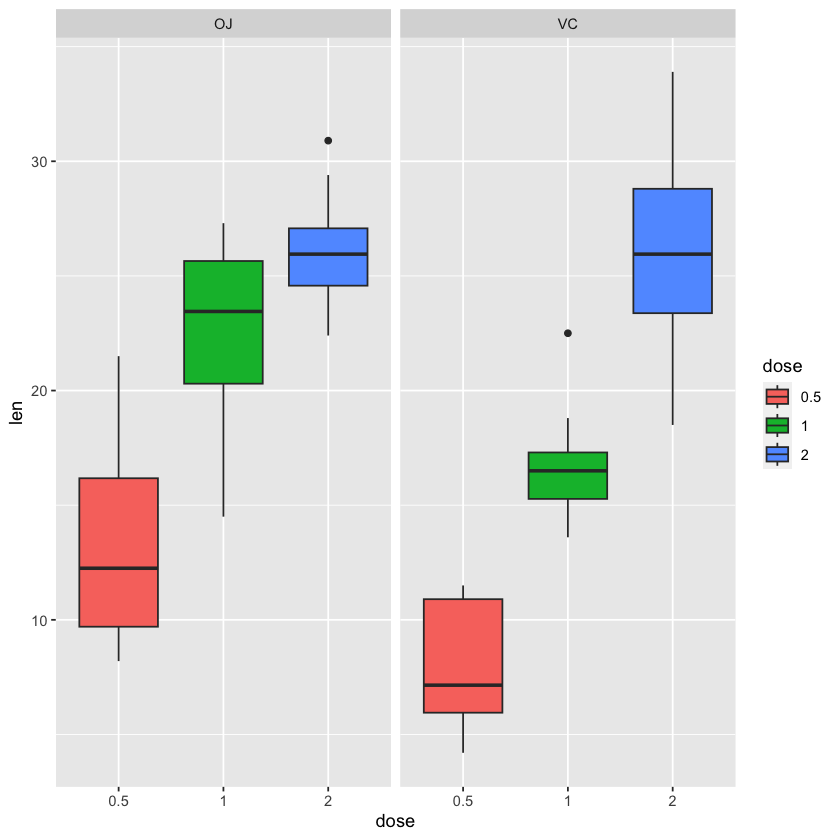

In [3]:
## Warning:  Paket ’ggplot2’ wurde unter R Version 4.2.2 erstellt
ToothGrowth$dose <- as.factor(ToothGrowth$dose);

ggplot(ToothGrowth,aes(x = dose, y = len, fill = dose )) +
    geom_boxplot() +
    facet_wrap( ~ supp);

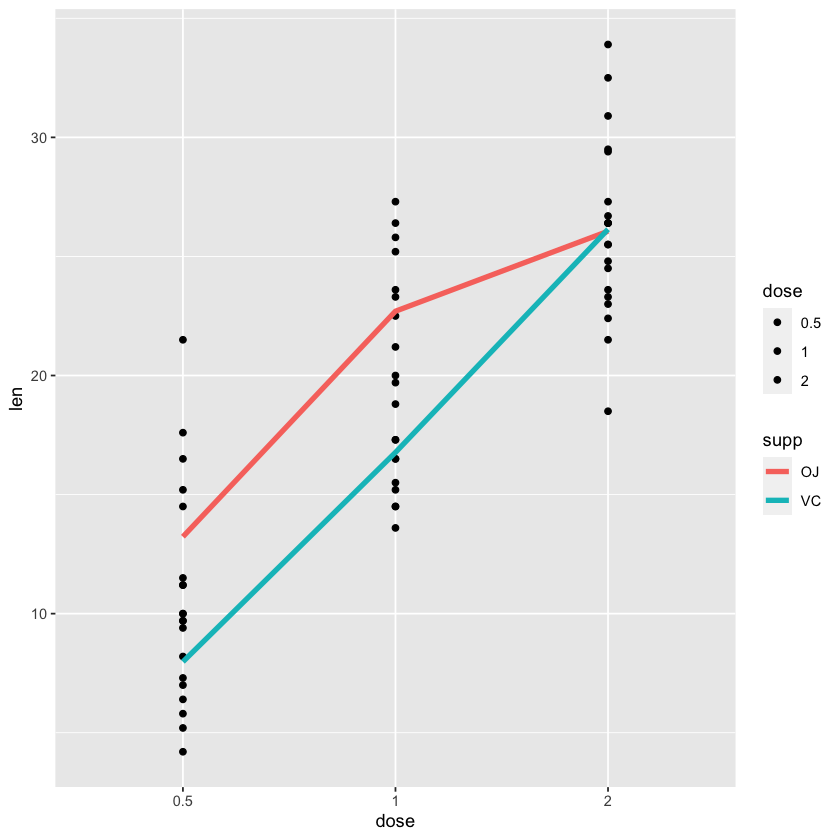

In [5]:
gg.base.1 <- ggplot(ToothGrowth,aes(x = dose, y = len, fill = dose )) +  geom_point()
gg.base.1 +  stat_summary(aes(group = supp, color = supp), geom = "line", fun.y = mean, size = 1.5)

In [6]:
## The mean effects model:
mod1 <- lm(len ~ as.factor(dose) + supp, data=ToothGrowth);
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(dose),2,2426.434,1213.21717,82.81093,1.871163e-17
supp,1,205.350,205.35000,14.01664,4.292793e-04
Residuals,56,820.425,14.65045,NA,NA


In [7]:
## The interaction model:
mod2 <- lm(len ~ as.factor(dose) * supp, data=ToothGrowth);
anova(mod2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.factor(dose),2,2426.434,1213.21717,91.999965,4.046291e-18
supp,1,205.350,205.35000,15.571979,2.311828e-04
as.factor(dose):supp,2,108.319,54.15950,4.106991,2.186027e-02
Residuals,54,712.106,13.18715,NA,NA


In [8]:
## Model comparison, F-test of dose*supplement interaction:
anova(mod1,mod2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,820.425,NA,NA,NA,NA
2,54,712.106,2,108.319,4.106991,0.02186027


## 2. Weight change on different diets
The data set is taken from the website: https://rcompanion.org/handbook/G_09.html. In order to conduct a (hypothetical) study about the association between eating habits and weight change, a (hypothetical) researcher enrolled 27 randomly selected participants (9 from each USA, UK, New Zealand), and using the blocks of size = 3, randomly assigned them to the experimental diet A, B, C. The resulting data set is given in the file DietWeight.txt.
1. Download the data and make some plots which can help to explore the interaction between Country and Diet.
2. Do the plots suggest that the effect of diet is not consistent across all three countries?
3. Carry out a formal statistical test to get evidence supporting your conclusion. Were the country wise differences significant?

In [9]:
## to read the data from a file:
DietWeight.data <- read.table("data/DietWeight.txt", sep = ",", header=TRUE)

In [10]:
### Order levels of the factor; otherwise R will alphabetize them
DietWeight.data$Country <- factor(DietWeight.data$Country, levels=unique(DietWeight.data$Country))

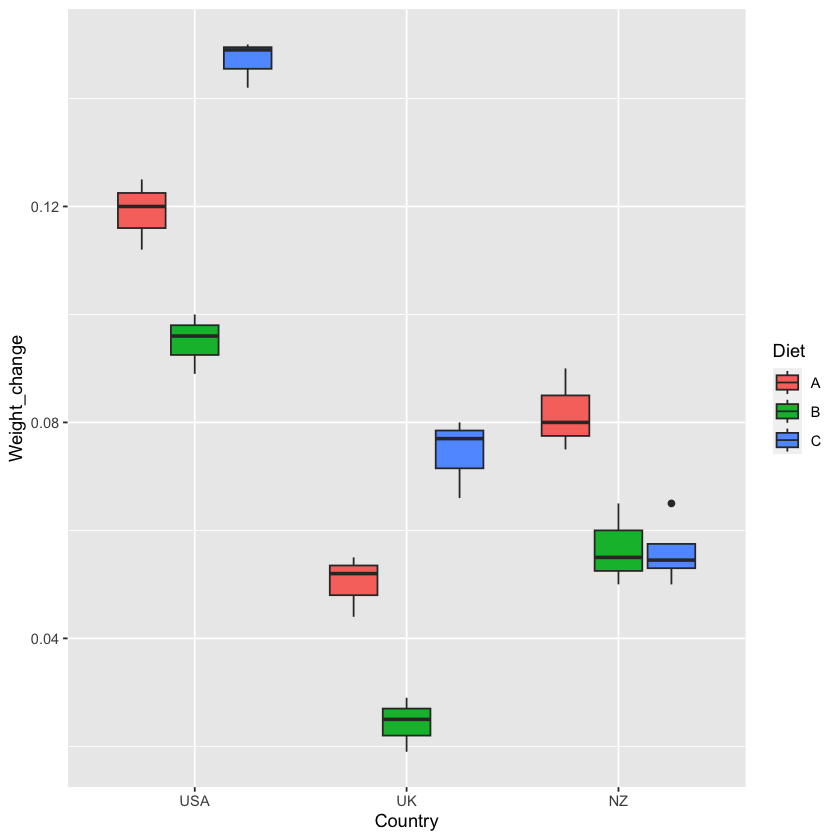

In [11]:
ggplot(DietWeight.data, aes(x = Country, y = Weight_change, fill = Diet )) + geom_boxplot()

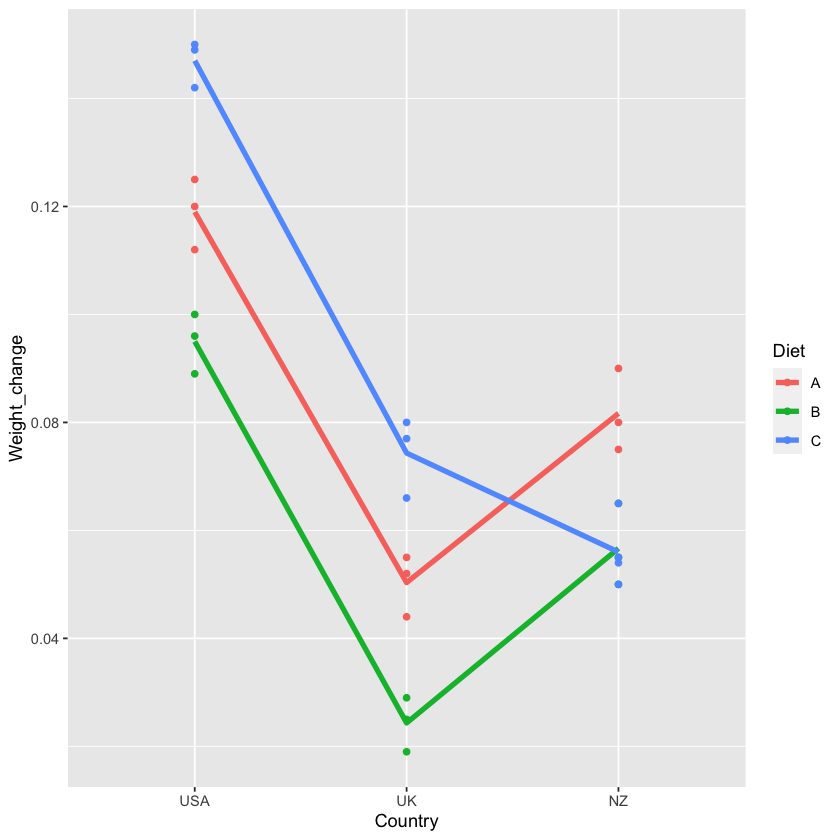

In [13]:
ggplot(DietWeight.data, aes(x = Country, y = Weight_change, color = Diet )) + 
    geom_point() + 
    stat_summary(aes(group = Diet, color = Diet), geom = "line", fun.y = mean, size = 1.5)

## 3. A study on nutrition education
The example is taken from the website: https://rcompanion.org/handbook/I_09.html. The data set consists of measurements obtained from a (mock) study of the effect of nutritional education on calorie consumption. The students enrolled in this experiment were randomly assigned to one of three groups each receiving instruction in nutrition education. The students were then asked to document their daily calorie intake once a month for six months.
1. Download the data set in the file "InstructionCalories.txt".
2. Using an appropriate statistical method, analyse the data to address the research question: which curriculum is better at decreasing calorie intake in students?

Hint: A hierarchical mixed-effects model with random intercept would be a good tool to analyse these data.

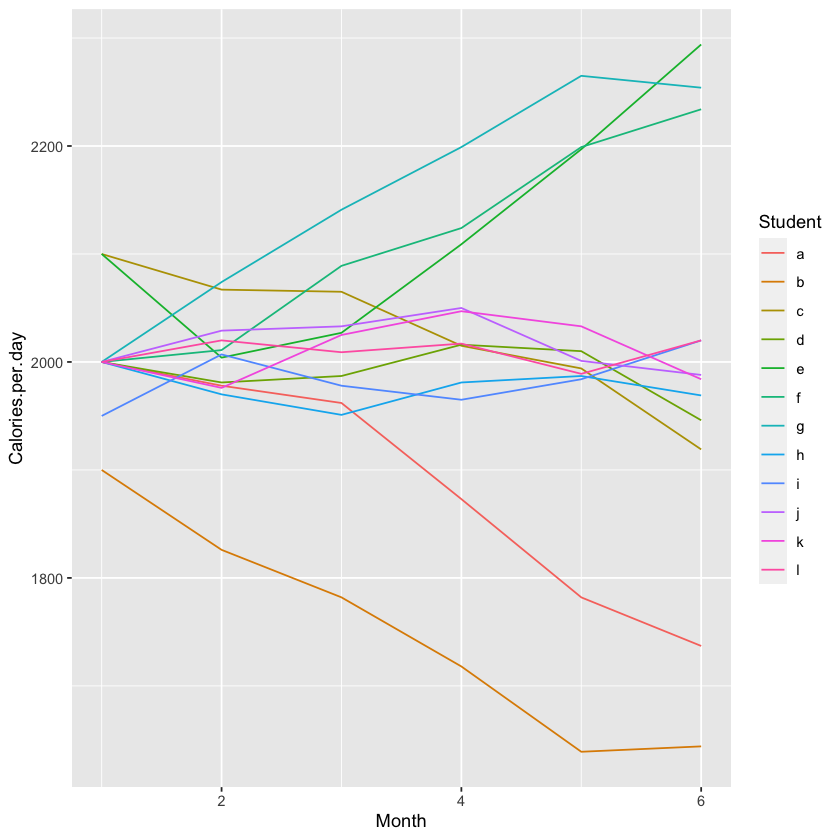

In [20]:
##
## How to approach:
## 1. Analyze the difference between each student’s final and initial intake. (One-wa
## 2. Use all measurements and apply repeated measures ANOVA
## In the second case, we can also specify the  autocorrelation structure.

## Or read from a data file:
Calories <- read.table("data/InstructionCalories.txt", sep = ",", header = TRUE)

### Order factors by the order in data frame ### Otherwise, R will alphabetize them 
Calories$Instruction <- factor(Calories$Instruction,
                         levels=unique(Calories$Instruction))

ggplot(Calories, aes(x = Month, y = Calories.per.day)) +
    geom_line(aes(color = Student, group = Student))

In [31]:
cals_m1 = subset(Calories, Calories$Month == "1")
cals_m6 = subset(Calories, Calories$Month == "6")

In [36]:
100 * (cals_m6$Calories.per.day - cals_m1$Calories.per.day)/cals_m1$Calories.per.day

[1] -13.150000 -13.473684  -8.619048  -2.700000   9.238095  11.700000
 [7]  12.700000  -1.550000   3.589744  -0.600000  -0.800000   1.000000

In [38]:
library("nlme")
library("emmeans")

model <- lme(Calories.per.day ~ Instruction + Month + Instruction*Month,
            random = ~1|Student,
            correlation = corAR1(form = ~ Month | Student,
                                 value = 0.4287),
            data=Data,
            method="REML")
summary(model)

ERROR: Error in library("emmeans"): there is no package called ‘emmeans’
